In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 500)

<h3 id="sigmoid---nnsigmoid">Sigmoid - <code>nn.Sigmoid()</code></h3>

$${Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$$


<p>If we stack sigmoids in many layers, it may be inefficient for the system to learn and requires careful initialization. This is because if the input is very large or small, the gradient of the sigmoid function is close to 0. In this case, there is no gradient flowing back to update the parameters, known as saturating gradient problem. Therefore, for deep neural networks, a single kink function (such as ReLU) is preferred.</p>

This is so called Sigmoid function and it is shown in the image below.  Sigmoid function takes a real-valued number and “squashes” it into range between 0 and 1, i.e., $(\sigma (x)\in (0,1))$. In particular, large negative numbers become 0 and large positive numbers become 1. Moreover, the sigmoid function has a nice interpretation as the firing rate of a neuron: from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1). But it has two major drawbacks: 1. Sigmoids saturate and kill gradients: The Sigmoid neuron has a property that when the neuron’s activation saturates at either tail of 0 or 1, the gradient (where $(\sigma'(x)=\sigma (x)\centerdot (1-\sigma (x)))$, see the red dotted line above) at these regions is almost zero. During backpropagation, this gradient will be multiplied to the gradient of this gate’s output for the whole objective. Therefore, if the local gradient is very small, it will effectively “kill” the gradient and almost no signal will flow through the neuron to its weights and recursively to its data. So, it is critically important to initialize the weights of sigmoid neurons to prevent saturation. For instance, if the initial weights are too large then most neurons would become saturated and the network will barely learn$(.^{[2]})$ 2. Sigmoid outputs are not zero-centered: It is undesirable since neurons in later layers of processing in a Neural Network would be receiving data that is not zero-centered. This has implications on the dynamics during gradient descent, because if the data coming into a neuron is always positive (e.g. $(x>0)$ elementwise in $(f(x)=w^{T}x+b))$, then the gradient on the weights $(w)$ will during backpropagation become either all be positive, or all negative (depending on the gradient of the whole expression $(f)$). This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem$(.^{[2]})$

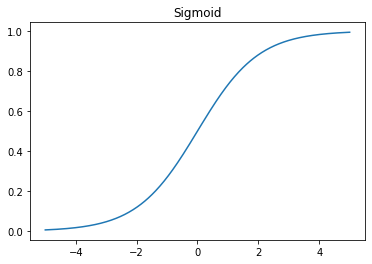

In [15]:
activation = nn.Sigmoid()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Sigmoid')
plt.show()

<h3 id="tanh---nntanh">Tanh - <code>nn.Tanh()</code></h3>

$${Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$$

<p>Tanh is basically identical to Sigmoid except it is centred, ranging from -1 to 1. The output of the function will have roughly zero mean. Therefore, the model will converge faster.  Note that convergence is usually faster if the average of each input variable is close to zero. One example is Batch Normalization.</p>

See the following image, tanh function is similar to Sigmoid function (Mathematically, $(tanh(x)=2\sigma (2x)-1)$), which is also sigmoidal (“S”-shaped). It squashes real-valued number to the range between -1 and 1, i.e., $(tanh(x)\in (-1, 1))$.  Like the Sigmoid units, its activations saturate, but its output is zero-centered (means tanh solves the second drawback of Sigmoid). Therefore, in practice the tanh units is always preferred to the sigmoid units. The derivative of tanh function is defined as $tanh'(x)=1-tanh^{2}(x)$ See the red dotted line in the above image, it interprets that tanh also saturate and kill gradient, since tanh’s derivative has similar shape as compare to Sigmoid’s derivative. What’s more, tanh has stronger gradients, since data is centered around 0, the derivatives are higher, and tanh avoids bias in the gradients.

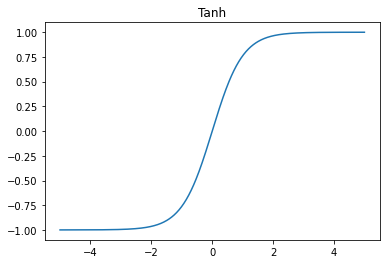

In [16]:
activation = nn.Tanh()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Tanh')
plt.show()

<h3 id="relu---nnrelu">Rectified Linear Units - <code>nn.ReLU()</code></h3>

$${ReLU}(x) = (x)^{+} = \max(0,x)$$

Where $x$ is the input to a neuron. In other words, the activation is simply thresholded at zero. The range of ReLU is betweem 0 to $(\infty)$. See the image below (red dotted line is the derivative)  The ReLU function is more effectively than the widely used logistic sigmoid and its more practical counterpart, the hyperbolic tangent, since it efficaciously reduce the computation cost as well as some other merits: 1. It was found to greatly accelerate (Krizhevsky et al.) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form $(.^{[2]})$ 2. Compared to tanh/sigmoid neurons that involve expensive oeprations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero $(.^{[2]})$

Unfortunately, ReLU also suffers several drawbacks, for instance, - ReLU units can be fragile during training and can “die”.

For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. You may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. With a proper setting of the learning rate this is less frequently an issue $(.^{[2]})$ Plus, here is a smooth approximation to the rectifier, which is called the softplus function (see the green line in the above image). It is defined as
$$
f(x)=\ln (1+e^{x})
$$
And its derivative is
$$
f'(x)=\frac{e^{x}}{1+e^{x}}=\frac{1}{1+e^{-x}}
$$
Interestingly, the derivative of Softplus is the logistic function. We can see that both the ReLU and Softplus are largely similar, except near 0 where the softplus is enticingly smooth and differentiable. But it is much easier and efficient to compute ReLU and its derivative than for the softplus function which has $(log(\centerdot))$ and $(exp(\centerdot))$ in its formulation. In deep learning, computing the activation function and its derivative is as frequent as addition and subtraction in arithmetic. By using ReLU, the forward and backward passes are much faster while retaining the non-linear nature of the activation function required for deep neural networks to be useful.

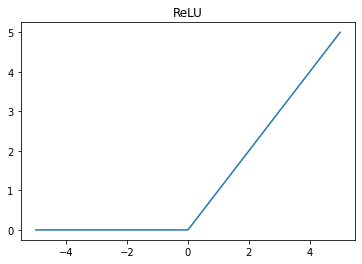

In [17]:
activation = nn.ReLU()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('ReLU')
plt.show()

<h3 id="leakyrelu---nnleakyrelu">LeakyReLU - <code>nn.LeakyReLU()</code></h3>

$${LeakyReLU}(x) = \begin{cases}
      x, & \text{if} x \geq 0\\
      a_\text{negative slope}x, & \text{otherwise}
    \end{cases}$$

<p>Here $a$ is a fixed parameter. The bottom part of the equation prevents the problem of dying ReLU which refers to the problem when ReLU neurons become inactive and only output 0 for any input. Therefore, its gradient is 0. By using a negative slope, it allows the network to propagate back and learn something useful.</p>

<p>LeakyReLU is necessary for skinny network, which is almost impossible to get gradients flowing back with vanilla ReLU. With LeakyReLU, the network can still have gradients even we are in the region where everything is zero out.</p>


<h3 id="rrelu---nnrrelu">RReLU - <code>nn.RReLU()</code></h3>

<p>There are variations in ReLU. The Random ReLU (RReLU) is defined as follows.</p>

$${RReLU}(x) = \begin{cases}
      x, & \text{if} x \geq 0\\
      ax, & \text{otherwise}
    \end{cases}$$

Randomized ReLU (RReLU) is a randomized version of Leaky ReLU, where the $(\alpha)$ is a random number. In RReLU, the slopes of negative parts are randomized in a given range in the training, and then fixed in the testing. It is reported that RReLU could reduce overfitting due to its randomized nature in the Kaggle National Data Science Bowl (NDSB) competition. 

Here gives the comparing graph of different ReLUs  For Parametric ReLU, $(\alpha_{i})$ is learned and for Leaky ReLU $(\alpha_{i})$ is fixed. For RReLU, $(\alpha_{ji})$ is a random variable keeps sampling in a given range, and remains fixed in testing. Generally, we summarize the advantages and potential problems of ReLUs: - (+) Biological plausibility: One-sided, compared to the antisymmetry of tanh. - (+) Sparse activation: For example, in a randomly initialized network, only about 50% of hidden units are activated (having a non-zero output). - (+) Efficient gradient propagation: No vanishing or exploding gradient problems. - (+) Efficient computation: Only comparison, addition and multiplication. - (+) Scale-invariant: $(max(0,\alpha x)=\alpha\centerdot max(0,x))$. - (-) Non-differentiable at zero: however it is differentiable anywhere else, including points arbitrarily close to (but not equal to) zero. - (-) Non-zero centered. - (-) Unbounded: Could potentially blow up. - (-) Dying Relu problem: Relu neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and “dies.” In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high.

<h3 id="prelu---nnprelu">PReLU - <code>nn.PReLU()</code></h3>

$${PReLU}(x) = \begin{cases}
      x, & \text{if} x \geq 0\\
      ax, & \text{otherwise}
    \end{cases}$$

<p>Here $a$ is a learnable parameter.</p>### Tanh Units

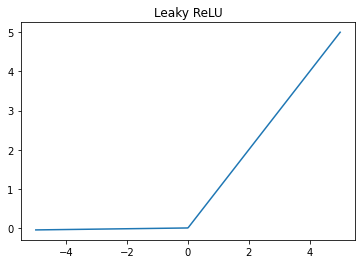

In [18]:
activation = nn.LeakyReLU()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Leaky ReLU')
plt.show()

### Maxout
Some other types of units that do not have the functional form $(f(w^{T}x+b))$ where a non-linearity is applied on the dot product between the weights and the data. One relatively popular choice is the Maxout neuron that generalizes the ReLU and its leaky version. The Maxout neuron computes the function

$$
max(w^{T}_{1}+b_{1},w^{T}_{2}+b_{2})
$$

Notice that both ReLU and Leaky ReLU are a special case of this form (for example, for ReLU we have $(w_{1},b_{1}=0)$). The Maxout neuron therefore enjoys all the benefits of a ReLU unit (linear regime of operation, no saturation) and does not have its drawbacks (dying ReLU). However, unlike the ReLU neurons it doubles the number of parameters for every single neuron, leading to a high total number of parameters.

### Softmax
The Softmax function (Used for multi-classification neural network output), or normalized exponential function, in mathematics, is a generalization of the logistic function that “squashes” a $(K)$-dimensional vector $(\mathbf{z})$ from arbitrary real values to a $(K)$-dimensional vector $(\sigma (\mathbf{z}))$ of real values in the range $([0,1])$ that add up to 1. The function is given by
$$
\sigma (\mathbf{z})_{j}=\frac{e^{z_{j}}}{\sum_{k=1}^{K}e^{z_{k}}}, j=1, 2, \dots, K
$$
In probability theory, the output of the Softmax function can be used to represent a categorical distribution, that is, a probability distribution over $(K)$ different possible outcomes. In fact, it is the gradient-log-normalizer of the categorical probability distribution. Here is an example of Softmax application 
<center>
<img src="images/softmax_ac.png"/>
</center>
The softmax function is used in various multiclass classification methods, such as multinomial logistic regression, multiclass linear discriminant analysis, naive Bayes classifiers, and artificial neural networks. Specifically, in multinomial logistic regression and linear discriminant analysis, the input to the function is the result of K distinct linear functions, and the predicted probability for the \(j\)th class given a sample vector $(\mathbf{x})$ and a weighting vector $(\mathbf{w})$ is

$$
P(y=j|\mathbf{x})=\frac{e^{x^{T}w_{j}}}{\sum_{k=1}^{K}e^{x^{T}w_{k}}}
$$

This can be seen as the composition of $(K)$ linear functions $(\mathbf{x}\mapsto x^{T}w_{1},\dots ,\mathbf{x}\mapsto x^{T}w_{K})$ and the softmax function (where $(x^{T}w)$ denotes the inner product of $(\mathbf{x})$ and $(\mathbf{w}))$. The operation is equivalent to applying a linear operator defined by $(\mathbf{w})$ to vectors $(\mathbf{x})$, thus transforming the original, probably highly-dimensional, input to vectors in a $(K)$-dimensional space $(R^{K})$. 

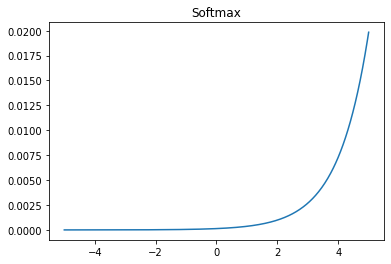

In [19]:
activation = nn.Softmax(dim=0)
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Softmax')
plt.show()

<h3 id="softmin---nnsoftmin">Softmin - <code>nn.Softmin()</code></h3>

$${Softmin}(x_i) = \frac{\exp(-x_i)}{\sum_j \exp(-x_j)}$$

<p>It turns numbers into a probability distribution.</p>

<p>The above activation functions (<em>i.e.</em> ReLU, LeakyReLU, PReLU) are scale-invariant.</p>

<h3 id="softplus---softplus">Softplus - <code>Softplus()</code></h3>

$${Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))$$


<p>Softplus is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.</p>

<p>The function will become more like ReLU, if the $\beta$ gets larger and larger.</p>

<h3 id="logsoftargmax---nnlogsoftmax">LogSoft(arg)max - <code>nn.LogSoftmax()</code></h3>

$${LogSoftmax}(x_i) = \log\left(\frac{\exp(x_i)}{\sum_j \exp(x_j)}\right)$$

<h3 id="elu---nnelu">ELU - <code>nn.ELU()</code></h3>

$${ELU}(x) = \max(0, x) + \min(0, \alpha * (\exp(x) - 1)$$

<p>Unlike ReLU, it can go below 0 which allows the system to have average output to be zero. Therefore, the model may converge faster. And its variations (CELU, SELU) are just different parametrizations.</p>


<h3 id="celu---nncelu">CELU - <code>nn.CELU()</code></h3>

$${CELU}(x) = \max(0, x) + \min(0, \alpha * (\exp(x/\alpha) - 1)$$

<h3 id="selu---nnselu">SELU - <code>nn.SELU()</code></h3>

$${SELU}(x) = \text{scale} * (\max(0, x) + \min(0, \alpha * (\exp(x) - 1))$$

<h3 id="gelu---nngelu">GELU - <code>nn.GELU()</code></h3>

$${GELU(x)} = x * \Phi(x)$$

<p>where $\Phi(x)$ is the Cumulative Distribution Function for Gaussian Distribution.</p>

<h3 id="relu6---nnrelu6">ReLU6 - <code>nn.ReLU6()</code></h3>

$${ReLU6}(x) = \min(\max(0,x),6)$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/ReLU6.png" height="400px" /><br />
<b>Fig. 10</b>: ReLU6
</center>

<p>This is ReLU saturating at 6. But there is no particular reason why picking 6 as saturation, so we can do better by using Sigmoid function below.</p>

<h3 id="softsign---nnsoftsign">Softsign - <code>nn.Softsign()</code></h3>

$${SoftSign}(x) = \frac{x}{1 + |x|}$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/Softsign.png" height="400px" /><br />
<b>Fig. 13</b>: Softsign
</center>

<p>It is similar to the Sigmoid function but gets to the asymptote slowly and alleviate the gradient vanishing problem (to some extent).</p>



<h3 id="hardtanh---nnhardtanh">Hardtanh - <code>nn.Hardtanh()</code></h3>

$${HardTanh}(x) = \begin{cases}
      1, & \text{if} x &gt; 1\\
      -1, & \text{if} x &lt; -1\\
      x, & \text{otherwise}
\end{cases}$$

<p>The range of the linear region [-1, 1] can be adjusted using <code>min_val</code> and <code>max_val</code>.</p>

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/Hardtanh.png" height="400px" /><br />
<b>Fig. 14</b>: Hardtanh
</center>

<p>It works surprisingly well especially when weights are kept within the small value range.</p>

<h3 id="threshold---nnthreshold">Threshold - <code>nn.Threshold()</code></h3>

$$y = \begin{cases}
      x, & \text{if} x &gt; \text{threshold}\\
      v, & \text{otherwise}
    \end{cases}$$

<p>It is rarely used because we cannot propagate the gradient back. And it is also the reason preventing people from using back-propagation in 60s and 70s when they were using binary neurons.</p>

<h3 id="tanhshrink---nntanhshrink">Tanhshrink - <code>nn.Tanhshrink()</code></h3>

$${Tanhshrink}(x) = x - \tanh(x)$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/Tanhshrink.png" height="400px" /><br />
<b>Fig. 15</b>: Tanhshrink
</center>

<p>It is rarely used except for sparse coding to compute the value of the latent variable.</p>


<h3 id="softshrink---nnsoftshrink">Softshrink - <code>nn.Softshrink()</code></h3>

$${SoftShrinkage}(x) = \begin{cases}
      x - \lambda, & \text{if} x &gt; \lambda\\
      x + \lambda, & \text{if} x &lt; -\lambda\\
      0, & \text{otherwise}
    \end{cases}$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/Softshrink.png" height="400px" /><br />
<b>Fig. 16</b>: Softshrink
</center>

<p>This basically shrinks the variable by a constant towards 0, and forces to 0 if the variable is close to 0. You can think of it as a step of gradient for the $\ell_1$ criteria. It is also one of the step of the Iterative Shrinkage-Thresholding Algorithm (ISTA). But it is not commonly used in standard neural network as activations.</p>


<h3 id="hardshrink---nnhardshrink">Hardshrink - <code>nn.Hardshrink()</code></h3>

$${HardShrinkage}(x) = \begin{cases}
      x, & \text{if} x &gt; \lambda\\
      x, & \text{if} x &lt; -\lambda\\
      0, & \text{otherwise}
    \end{cases}$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/Hardshrink.png" height="400px" /><br />
<b>Fig. 17</b>: Hardshrink
</center>

<p>It is rarely used except for sparse coding.</p>


<h3 id="logsigmoid---nnlogsigmoid">LogSigmoid - <code>nn.LogSigmoid()</code></h3>

$${LogSigmoid}(x) = \log\left(\frac{1}{1 + \exp(-x)}\right)$$

<center>
<img src="/pytorch-Deep-Learning/images/week11/11-1/LogSigmoid.png" height="400px" /><br />
<b>Fig. 18</b>: LogSigmoid
</center>

# Loss Functions

This python script illustrates the different loss functions for regression and classification. We start by loading the ncessary libraries and resetting the computational graph.

In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [21]:
# Various Predicted X-values
X = torch.linspace(-1, 1, 500)

# Create our target of zero
y = torch.zeros(500)

Loss function is an important part in artificial neural networks, which is used to measure the inconsistency between predicted value $((\hat{y}))$ and actual label $((y))$. It is a non-negative value, where the robustness of model increases along with the decrease of the value of loss function. Loss function is the hard core of empirical risk function as well as a significant component of structural risk function. Generally, the structural risk function of a model is consist of empirical risk term and regularization term, which can be represented as
$$\boldsymbol{\theta}^{*}=\arg\min_{\boldsymbol{\theta}}\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})+\lambda\centerdot\Phi(\boldsymbol{\theta})=\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},\hat{y}^{(i)}\big)+\lambda\centerdot\Phi(\boldsymbol{\theta})\\=\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)+\lambda\centerdot\Phi(\boldsymbol{\theta})$$
where $(\Phi(\boldsymbol{\theta}))$ is the regularization term or penalty term, $(\boldsymbol{\theta})$ is the parameters of model to be learned, $(f(\centerdot))$ represents the activation function and $(\mathbf{x}^{(i)}=\{x_{1}^{(i)},x_{2}^{(i)},\dots ,x_{m}^{(i)}\}\in\mathbb{R}^{m})$ denotes the a training sample.
Here we only concentrate on the empirical risk term (loss function)$\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})=\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)$and introduce the mathematical expressions of several commonly-used loss functions as well as the corresponding expression in DeepLearning4J.

<h3 id="nnmseloss"><code>nn.MSELoss()</code></h3>

<p>This function gives the mean squared error (squared L2 norm) between each element in the input $x$ and target $y$. It is also called L2 loss.</p>

<p>If we are using a minibatch of $n$ samples, then there are $n$ losses, one for each sample in the batch. We can tell the loss function to keep that loss as a vector or to reduce it.</p>

<p>If unreduced (<em>i.e.</em> set <code>reduction='none'</code>), the loss is</p>

$$l(x,y) = L = \{l_1, \dots, l_N\}^\top, l_n = (x_n - y_n)^2$$

<p>where $N$ is the batch size, $x$ and $y$ are tensors of arbitrary shapes with a total of n elements each.</p>

<p>The reduction options are below (note that the default value is <code>reduction='mean'</code>).</p>

$$l(x,y) = \begin{cases}\text{mean}(L), \quad &\text{if reduction='mean'}\\
\text{sum}(L), \quad &\text{if reduction='sum'}
\end{cases}$$

<p>The sum operation still operates over all the elements, and divides by $n$.</p>

<p>The division by $n$ can be avoided if one sets <code>reduction = 'sum'</code>.</p>

In [22]:
loss = nn.MSELoss(reduction='mean')
out = loss(X, y)
out

tensor(0.3347)

#### Mean Squared Logarithmic Error
Mean Squared Logarithmic Error (MSLE) loss function is a variant of MSE, which is defined as
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big(\log(y^{(i)}+1)-\log(\hat{y}^{(i)}+1)\big)^{2}
$$
MSLE is also used to measure the different between actual and predicted. By taking the log of the predictions and actual values, what changes is the variance that you are measuring. It is usually used when you do not want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers. Another thing is that MSLE penalizes under-estimates more than over-estimates. 1. If both predicted and actual values are small: MSE and MSLE is same. 2. If either predicted or the actual value is big: $(MSE > MSLE)$. 3. If both predicted and actual values are big: $(MSE > MSLE)$ (MSLE becomes almost negligible).

### L2
L2 loss function is the square of the L2 norm of the difference between actual value and predicted value. It is mathematically similar to MSE, only do not have division by $(n)$, it is computed by
$$
\boldsymbol{\mathcal{L}}=\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}
$$
For more details, typically in mathematic, please read the paper: On Loss Functions for Deep Neural Networks in Classification, which gives comprehensive explanation about several commomly-used loss functions, including L2, L1 loss function.

In [23]:
l2_loss = nn.MSELoss(reduction='none')
l2_out = l2_loss(X, y)

### Mean Absolute Error
Mean Absolute Error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes, which is computed by $$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big\lvert y^{(i)}-\hat{y}^{(i)}\big\rvert
$$
where $(\lvert\centerdot\rvert)$ denotes the absolute value. Albeit, both MSE and MAE are used in predictive modeling, there are several differences between them. MSE has nice mathematical properties which makes it easier to compute the gradient. However, MAE requires more complicated tools such as linear programming to compute the gradient. Because of the square, large errors have relatively greater influence on MSE than do the smaller error. Therefore, MAE is more robust to outliers since it does not make use of square. On the other hand, MSE is more useful if concerning about large errors whose consequences are much bigger than equivalent smaller ones. MSE also corresponds to maximizing the likelihood of Gaussian random variables.

In [29]:
loss = nn.L1Loss(reduction='mean')
out = loss(X, y)
out

tensor(0.5010)

### Mean Absolute Percentage Error
Mean Absolute Percentage Error (MAPE) is a variant of MAE, it is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\bigg\lvert\frac{y^{(i)}-\hat{y}^{(i)}}{y^{(i)}}\bigg\rvert\centerdot100
$$
Although the concept of MAPE sounds very simple and convincing, it has major drawbacks in practical application: 1. It cannot be used if there are zero values (which sometimes happens for example in demand data) because there would be a division by zero. 2. For forecasts which are too low the percentage error cannot exceed $(100\%)$, but for forecasts which are too high there is no upper limit to the percentage error. 3. When MAPE is used to compare the accuracy of prediction methods it is biased in that it will systematically select a method whose forecasts are too low. This little-known but serious issue can be overcome by using an accuracy measure based on the ratio of the predicted to actual value (called the Accuracy Ratio), this approach leads to superior statistical properties and leads to predictions which can be interpreted in terms of the geometric mean.

### L1
<h3 id="nnl1loss"><code>nn.L1Loss()</code></h3>

<p>This measures the mean absolute error (MAE) between each element in the input $x$ and target $y$ (or the actual output and desired output).</p>

<p>If unreduced (<em>i.e.</em> set <code>reduction='none'</code>), the loss is</p>

$$l(x,y) = L = \{l_1, \dots, l_N\}^\top, l_n = \vert x_n - y_n\vert$$

<p>, where $N$ is the batch size, $x$ and $y$ are tensors of arbitrary shapes with a total of n elements each.</p>

<p>It also has <code>reduction</code> option of <code>'mean'</code> and <code>'sum'</code> similar to what <code>nn.MSELoss()</code> have.</p>

<p><strong>Use Case:</strong> L1 loss is more robust against outliers and noise compared to L2 loss. In L2, the errors of those outlier/noisy points are squared, so the cost function gets very sensitive to outliers.</p>

<p><strong>Problem:</strong> The L1 loss is not differentiable at the bottom (0). We need to be careful when handling its gradients (namely Softshrink). This motivates the following SmoothL1Loss.</p>

In [25]:
l1_loss = nn.L1Loss(reduction='none')
l1_out = l1_loss(X, y)

### Pseudo-Huber Loss
The psuedo-huber loss function is a smooth approximation to the L1 loss as the (predicted - target) values get larger. When the predicted values are close to the target, the pseudo-huber loss behaves similar to the L2 loss.

$$\text{loss}(x, y) = \frac{1}{n} \sum_{i} z_{i}\$$

<h3 id="nnsmoothl1loss"><code>nn.SmoothL1Loss()</code></h3>

<p>This function uses L2 loss if the absolute element-wise error falls below 1 and L1 loss otherwise.</p>

<p>\(\text{loss}(x, y) = \frac{1}{n} \sum_i z_i\)
, where $z_i$ is given by</p>

$$z_i = \begin{cases}0.5(x_i-y_i)^2, \quad &\text{if } |x_i - y_i| &lt; 1\\
|x_i - y_i| - 0.5, \quad &\text{otherwise}
\end{cases}$$

<p>It also has <code>reduction</code> options.</p>

<p>This is advertised by Ross Girshick (<a href="https://arxiv.org/abs/1504.08083">Fast R-CNN</a>). The Smooth L1 Loss is also known as the Huber Loss or  the Elastic Network when used as an objective function,.</p>

<p><strong>Use Case:</strong> It is less sensitive to outliers than the <code>MSELoss</code> and is smooth at the bottom. This function is often used in computer vision for protecting against outliers.</p>

<p><strong>Problem:</strong> This function has a scale ($0.5$ in the function above).</p>

In [26]:
p_huber = nn.SmoothL1Loss(reduction='none')
p_out = p_huber(X, y)

## Plot the Regression Losses
Here we use Matplotlib to plot the L1, L2, and Pseudo-Huber Losses.

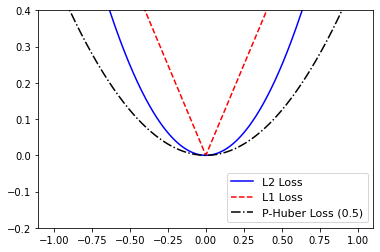

In [27]:
plt.plot(X.numpy(), l2_out.numpy(), 'b-', label='L2 Loss')
plt.plot(X.numpy(), l1_out.numpy(), 'r--', label='L1 Loss')
plt.plot(X.numpy(), p_out.numpy(), 'k-.', label='P-Huber Loss (0.5)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

<h3 id="l1-vs-l2-for-computer-vision">L1 <em>vs.</em> L2 for Computer Vision</h3>

<p>In making predictions when we have a lot of different $y$’s:</p>

<ul>
  <li>If we use MSE (L2 Loss), it results in an average of all $y$, which in CV it means we will have a blurry image.</li>
  <li>If we use L1 loss, the value $y$ that minimize the L1 distance is the medium, which is not blurry, but note that medium is difficult to define in multiple dimensions.</li>
</ul>

<p>Using L1 results in sharper image for prediction.</p>

<h3 id="nnnllloss"><code>nn.NLLLoss()</code></h3>

<p>It is the negative log likelihood loss used when training a classification problem with C classes.</p>

<p>Note that, mathematically, the input of <code>NLLLoss</code> should be (log) likelihoods, but PyTorch doesn’t enforce that. So the effect is to make the desired component as large as possible.</p>

<p>The unreduced (<em>i.e.</em> with :attr:<code>reduction</code> set to <code>'none'</code>) loss can be described as:</p>

$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = - w_{y_n} x_{n,y_n}, \quad
        w_{c} = \text{weight}[c] \cdot \mathbb{1}\{c \not= \text{ignore\_index}\}$$

<p>,where $N$ is the batch size.</p>

<p>If <code>reduction</code> is not <code>'none'</code> (default <code>'mean'</code>), then</p>

$$\ell(x, y) = \begin{cases}
            \sum_{n=1}^N \frac{1}{\sum_{n=1}^N w_{y_n}} l_n, &
            \text{if reduction} = \text{'mean';}\\
            \sum_{n=1}^N l_n,  &
            \text{if reduction} = \text{'sum'.}
        \end{cases}$$

<p>This loss function has an optional argument <code>weight</code> that can be passed in using a 1D Tensor assigning weight to each of the classes. This is useful when dealing with imbalanced training set.</p>

<h4 id="weights--imbalanced-classes">Weights & Imbalanced Classes:</h4>

<p>Weight vector is useful if the frequency is different for each category/class. For example, the frequency of the common flu is much higher than the lung cancer. We can simply increase the weight for categories that has small number of samples.</p>

<p>However, instead of setting the weight, it’s better to equalize the frequency in training so that we can exploits stochastic gradients better.</p>

<p>To equalize the classes in training, we put samples of each class in a different buffer. Then generate each minibatch by picking the same number samples from each buffer. When the smaller buffer runs out of samples to use, we iterate through the smaller buffer from the beginning again until every sample of the larger class is used. This way gives us equal frequency for all categories by going through those circular buffers. We should never go the easy way to equalize frequency by <strong>not</strong> using all samples in the majority class. Don’t leave data on the floor!</p>

<p>An obvious problem of the above method is that our NN model wouldn’t know the relative frequency of the actual samples. To solve that, we fine-tune the system by running a few epochs at the end with the actual class frequency, so that the system adapts to the biases at the output layer to favour things that are more frequent.</p>

<p>To get an intuition of this scheme, let’s go back to the medical school example: students spend just as much time on rare disease as they do on frequent diseases (or maybe even more time, since the rare diseases are often the more complex ones). They learn to adapt to the features of all of them, then correct it to know which are rare.</p>


## Categorical Predictions

-------------------------------

We now consider categorical loss functions.  Here, the predictions will be around the target of 1.

In [28]:
# Various predicted X values
x_vals = torch.empty(500, dtype=torch.long).random_(5)

# Target of 1.0
y_val = torch.empty(500, dtype=torch.long).random_(5)

### Kullback Leibler (KL) Divergence
KL Divergence, also known as relative entropy, information divergence/gain, is a measure of how one probability distribution diverges from a second expected probability distribution. KL divergence loss function is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\mathcal{D}_{KL}(y^{(i)}||\hat{y}^{(i)})=\frac{1}{n}\sum_{i=1}^{n}\big[y^{(i)}\centerdot\log\big(\frac{y^{(i)}}{\hat{y}^{(i)}}\big)\big]\\=\underbrace{\frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}\centerdot\log(y^{(i)})\big)}_{\boldsymbol{entropy}}\underbrace{-\frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}\centerdot\log(\hat{y}^{(i)})\big)}_{\boldsymbol{cross-entropy}}
$$
where the first term is entropy and another is cross entropy (another kind of loss function which will be introduced later). KL divergence is a distribution-wise asymmetric measure and thus does not qualify as a statistical metric of spread. In the simple case, a KL divergence of 0 indicates that we can expect similar, if not the same, behavior of two different distributions, while a KL divergence of 1 indicates that the two distributions behave in such a different manner that the expectation given the first distribution approaches zero. For more details, please visit the wikipedia: [link].

<code>nn.KLDivLoss()</code>

$$\ell(x,y) = L = \{l_1,...,l_N\}^T, \qquad l_n = y_n(\log y_n-x_n)$$

<p>This is simple loss function for when your target is a one-hot distribution (<em>i.e.</em> $y$ is a category). Again it assumes $x$ and $y$ are probabilities. It has the disadvantage that it is not merged with a softmax or log-softmax so it may have numerical stability issues.</p>

### Cross Entropy
Cross Entropy is commonly-used in binary classification (labels are assumed to take values 0 or 1) as a loss function (For multi-classification, use Multi-class Cross Entropy), which is computed by
$$
\boldsymbol{\mathcal{L}}=-\frac{1}{n}\sum_{i=1}^{n}\big[y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})\big]
$$
Cross entropy measures the divergence between two probability distribution, if the cross entropy is large, which means that the difference between two distribution is large, while if the cross entropy is small, which means that two distribution is similar to each other. As we have mentioned in MSE that it suffers slow divergence when using Sigmoid as activation function, here the cross entropy does not have such problem. Samely, $(\hat{y}^{(i)}=\sigma(\mathbf{z}^{(i)})=\sigma(\boldsymbol{\theta}^{T}\mathbf{x}^{(i)}))$, and we only consider one training sample, by using Sigmoid, we have $(\boldsymbol{\mathcal{L}}=y\log(\sigma(\mathbf{z}))+(1-y)\log(1-\sigma(\mathbf{z})))$, and compute it derivative as
$$
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=(y-\sigma(\mathbf{z}))\centerdot\mathbf{x}
$$
compare to the derivative in MSE, it eliminates the term $(\sigma'(\mathbf{z}))$, where the learning speed is only controlled by $((y-\sigma(\mathbf{z})))$. In this case, when the difference between predicted value and actual value is large, the learning speed, i.e., convergence speed, is fast, otherwise, the difference is small, the learning speed is small, this is our expectation. Generally, comparing to quadratic cost function, cross entropy cost function has the advantages that fast convergence and is more likely to reach the global optimization (like the momentum, it increases the update step). For the mathematical details, see wikipedia: [link].

<code>nn.CrossEntropyLoss()</code>

<p>This function combines <code>nn.LogSoftmax</code> and <code>nn.NLLLoss</code> in one single class. The combination of the two makes the score of the correct class as large as possible.</p>

<p>The reason why the two functions are merged here is for numerical stability of gradient computation. When the value after softmax is close to 1 or 0, the log of that can get close to 0 or $-\infty$. Slope of log close to 0 is close to $\infty$, causing the intermediate step in backpropagation to have numerical issues. When the two functions are combined, the gradients is saturated so we get a reasonable number at the end.</p>

<p>The input is expected to be unnormalised score for each class.</p>

<p>The loss can be described as:</p>

$${loss}(x, c) = -\log\left(\frac{\exp(x[c])}{\sum_j \exp(x[j])}\right)
= -x[c] + \log\left(\sum_j \exp(x[j])\right)$$

<p>or in the case of the <code>weight</code> argument being specified:</p>

$${loss}(x, c) = w[c] \left(-x[c] + \log\left(\sum_j\exp(x[j])\right)\right)$$

<p>The losses are averaged across observations for each minibatch.</p>

<p>A physical interpretation of the Cross Entropy Loss is related to the Kullback–Leibler divergence (KL divergence), where we are measuring the divergence between two distributions. Here, the (quasi) distributions are represented by the x vector (predictions) and the target distribution (a one-hot vector with 0 on the wrong classes and 1 on the right class).</p>

<p>Mathematically,</p>

$$H(p,q) = H(p) + \mathcal{D}_{KL} (p \mid\mid q)$$

<p>where \(H(p,q) = - \sum_i p(x_i) \log (q(x_i))\) is the cross-entropy (between two distributions), \(H(p) = - \sum_i p(x_i) \log (p(x_i))\) is the entropy, and \(\mathcal{D}_{KL} (p \mid\mid q) = \sum_i p(x_i) \log \frac{p(x_i)}{q(x_i)}\) is the KL divergence.</p>

<h3 id="nnadaptivelogsoftmaxwithloss"><code>nn.AdaptiveLogSoftmaxWithLoss()</code></h3>

<p>This is an efficient softmax approximation of softmax for large number of classes (for example, millions of classes). It implements tricks to improve the speed of the computation.</p>

<p>Details of the method is described in <a href="https://arxiv.org/abs/1609.04309">Efficient softmax approximation for GPUs</a> by Edouard Grave, Armand Joulin, Moustapha Cissé, David Grangier, Hervé Jégou.</p>





### Poisson
Poisson loss function is a measure of how the predicted distribution diverges from the expected distribution, the poisson as loss function is a variant from Poisson Distribution, where the poisson distribution is widely used for modeling count data. It can be shown to be the limiting distribution for a normal approximation to a binomial where the number of trials goes to infinity and the probability goes to zero and both happen at such a rate that np is equal to some mean frequency for the process. In DL4J, the poisson loss function is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big(\hat{y}^{(i)}-y^{(i)}\centerdot\log(\hat{y}^{(i)})\big)
$$


<h3 id="binary-cross-entropy-bce-loss---nnbceloss"><a href="https://www.youtube.com/watch?v=bj1fh3BvqSU&t=3207s">Binary Cross Entropy (BCE) Loss - <code>nn.BCELoss()</code></a></h3>

$$\ell(x,y) = L = \{l_1,...,l_N\}^T, \qquad l_n = -w_n[y_n\log x_n+(1-y_n)\log(1-x_n)]$$

<p>This loss is a special case of cross entropy for when you have only two classes so it can be reduced to a simpler function. This is used for measuring the error of a reconstruction in, for example, an auto-encoder. This formula assume $x$ and $y$ are probabilities, so they are strictly between 0 and 1.</p>

<h3 id="bce-loss-with-logits---nnbcewithlogitsloss">BCE Loss with Logits - <code>nn.BCEWithLogitsLoss()</code></h3>

$$\ell(x,y) = L = \{l_1,...,l_N\}^T, \qquad l_n = -w_n[y_n\log \sigma(x_n)+(1-y_n)\log(1-\sigma(x_n))]$$

<p>This version of binary cross entropy loss takes scores that haven’t gone through softmax so it does not assume x is between 0 and 1. It is then passed through a sigmoid to ensure it is in that range. The loss function is more likely to be numerically stable when combined like this.</p>

<h3 id="margin-ranking-loss---nnmarginrankingloss">Margin Ranking Loss - <code>nn.MarginRankingLoss()</code></h3>

$$L(x,y) = \max(0, -y*(x_1-x_2)+\text{margin})$$

<p>Margin losses are an important category of losses. If you have two inputs, this loss function says you want one input to be larger than the other one by at least a margin. In this case $y$ is a binary variable $\in { -1, 1}$. Imagine the two inputs are scores of two categories. You want the score for the correct category larger than the score for the incorrect categories by at least some margin.  Like hinge loss, if $y*(x_1-x_2)$ is larger than margin, the cost is 0. If it is smaller, the cost increases linearly. If you were to use this for classification, you would have $x_1$ be the score of the correct answer and $x_2$ be the score of the highest scoring incorrect answer in the mini-batch. If used in energy based models (discussed later), this loss function pushes down on the correct answer $x_1$ and up on the incorrect answer $x_2$.</p>

<h3 id="triplet-margin-loss---nntripletmarginloss">Triplet Margin Loss - <code>nn.TripletMarginLoss()</code></h3>

$$L(a,p,n) = \max\{d(a_i,p_i)-d(a_i,n_i)+\text{margin}, 0\}$$

<p>This loss is used for measuring a relative similarity between samples.  For example, you put two images with the same category through a CNN and get two vectors. You want the distance between those two vectors to be as small as possible. If you put two images with different categories through a CNN, you want the distance between those vectors to be as large as possible. This loss function tries to send the first distance toward 0 and the second distance larger than some margin.  However, the only thing that matter is that the distance between the good pair is smaller than the distance between the bad pair.</p>

<center>
<img src="images/tml.png" width="30%" /><br />
<b>Fig. 1</b>: Triplet Margin Loss
</center>

<p>This was originally used to train an image search system for Google. At that time, you would type a query into Google and it would encode that query into a vector. It would then compare that vector to a bunch of vectors from images that were previously indexed. Google would then retrieve the images that were the closest to your vector.</p>

<h3 id="soft-margin-loss---nnsoftmarginloss">Soft Margin Loss - <code>nn.SoftMarginLoss()</code></h3>

$$L(x,y) = \sum_i\frac{\log(1+\exp(-y[i]*x[i]))}{x.\text{nelement()}}$$

<p>Creates a criterion that optimizes a two-class classification logistic loss between input tensor $x$  and target tensor $y$  (containing 1 or -1).</p>

<ul>
  <li>This softmax version of a margin loss. You have a bunch of positives and a bunch of negatives you want to pass through a softmax. This loss function then tries to make $\text{exp}(-y[i]*x[i])$ for the correct $x[i]$ smaller than for any other.</li>
  <li>This loss function wants to pull the positive values of $y[i]*x[i]$ closer together and push the negative values far apart but, as opposed to a hard margin, with some continuous, exponentially decaying effect on the loss .</li>
</ul>

<h3 id="multi-class-hinge-loss---nnmultilabelmarginloss">Multi-Class Hinge Loss - <code>nn.MultiLabelMarginLoss()</code></h3>

$$L(x,y)=\sum_{ij}\frac{max(0,1-(x[y[j]]-x[i]))}{x.\text{size}(0)}$$

<p>This margin-base loss allows for different inputs to have variable amounts of targets. In this case you have several categories for which you want high scores and it sums the  hinge loss over all categories. For EBMs, this loss function pushes down on desired categories and pushes up on non-desired categories.</p>

<h3 id="hinge-embedding-loss---nnhingeembeddingloss">Hinge Embedding Loss - <code>nn.HingeEmbeddingLoss()</code></h3>

$$l_n =
\left\{
     \begin{array}{lr}
     x_n, &\quad y_n=1,  \\
     \max\{0,\Delta-x_n\}, &\quad y_n=-1  \\
     \end{array}
\right.$$

<p>Hinge embedding loss used for semi-supervised learning by measuring whether two inputs are similar or dissimilar. It pulls together things that are similar and pushes away things are dissimilar. The $y$ variable indicates whether the pair of scores need to go in a certain direction. Using a hinge loss, the score is positive if $y$ is 1 and some margin $\Delta$ if $y$ is -1.</p>

<h3 id="cosine-embedding-loss---nncosineembeddingloss">Cosine Embedding Loss - <code>nn.CosineEmbeddingLoss()</code></h3>

$$l_n =
\left\{
     \begin{array}{lr}
     1-\cos(x_1,x_2), & \quad y=1,  \\
     \max(0,\cos(x_1,x_2)-\text{margin}), & \quad y=-1
     \end{array}
\right.$$

<p>This loss is used for measuring whether two inputs are similar or dissimilar, using the cosine distance, and is typically used for learning nonlinear embeddings or semi-supervised learning.</p>

<ul>
  <li>Thought of another way, 1 minus the cosine of the angle between the two vectors is basically the normalised Euclidean distance.</li>
  <li>The advantage of this is that whenever you have two vectors and you want to make their distance as large as possible, it is very easy to make the network achieve this by make the vectors very long. Of course this is not optimal. You don’t want the system to make the vectors big but rotate vectors in the right direction so you normalise the vectors and calculate the normalised Euclidean distance.</li>
  <li>For positive cases, this loss tries to make the vectors as aligned as possible. For negative pairs, this loss tries to make the cosine smaller than a particular margin. The margin here should be some small positive value.</li>
  <li>In a high dimensional space, there is a lot of area near the equator of the sphere. After normalisation, all your points are now normalised on the sphere. What you want is samples that are semantically similar to you to be close. The samples that are dissimilar should be orthogonal. You don’t want them to be opposite each other because there is only one point at the opposite pole. Rather, on the equator, there is a very large amount of space so you want to make the margin some small positive value so you can take advantage of all this area.</li>
</ul>

<h3 id="connectionist-temporal-classification-ctc-loss---nnctcloss"><a href="https://www.youtube.com/watch?v=bj1fh3BvqSU&t=4103s">Connectionist Temporal Classification (CTC) Loss - <code>nn.CTCLoss()</code></a></h3>

<p>Calculates loss between a continuous (unsegmented) time series and a target sequence.</p>
<ul>
  <li>CTC loss sums over the probability of possible alignments of input to target, producing a loss value which is differentiable with respect to each input node.</li>
  <li>The alignment of input to target is assumed to be “many-to-one”, which limits the length of the target sequence such that it must less than or equal to the input length.</li>
  <li>Useful when your output is a sequence of vectors, which is correspond to scores of categories.</li>
</ul>

<center>
<img src="images/Fig1.png" width="30%" /><br />
<b>Fig. 2</b>: CTC Loss for speech recognition
</center>

<p>Application Example: Speech recognition system</p>
<ul>
  <li>Goal: Predict what word is being pronounced every 10 milliseconds.</li>
  <li>Each word is represented by a sequence of sounds.</li>
  <li>Depends on the person’s speaking speed, different length of the sounds might be mapped to the same word.</li>
  <li>Find the best mapping from the input sequence to the output sequence. A good method for this is using dynamic programming to find the minimum cost path.</li>
</ul>

<center>
<img src="images/Fig2.png" width="30%" style="background-color:white;" /><br />
<b>Fig. 3</b>: Many-to-one mapping setup
</center>

<h1 id="energy-based-models-part-iv---loss-function">Energy-Based Models (Part IV) - Loss Function</h1>

<h2 id="architecture-and-loss-functional">Architecture and Loss Functional</h2>

<p>Family of energy functions: $\mathcal{E} = {E(W,Y, X) : W \in \mathcal{W}}$.</p>

<p>Training set: $S = {(X^i, Y^i): i = 1 \cdots P}$</p>

<p>Loss functional: $\mathcal{L} (E, S)$</p>
<ul>
  <li>Functional means a function of another function. In our case, the functional $\mathcal{L} (E, S)$ is a function of the energy function $E$.</li>
  <li>Because $E$ is parametrised by $W$, we can turn the functional to a loss function of $W$: $\mathcal{L} (W, S)$</li>
  <li>Measures the quality of an energy function on training set</li>
  <li>Invariant under permutations and repetitions of the samples.</li>
</ul>

<p>Training: $W^* = \min_{W\in \mathcal{W}} \mathcal{L}(W, S)$.</p>

<p>Form of the loss functional:</p>
<ul>
  <li>$L(Y^i, E(W, \mathcal{Y}, X^i))$ is per-sample loss</li>
  <li>$Y^i$ is desired answer, can be category or a whole image, etc.</li>
  <li>$E(W, \mathcal{Y}, X^i)$ is energy surface for a given $X_i$ as $Y$ varies</li>
  <li>$R(W)$ is regulariser</li>
</ul>

$$\mathcal{L}(E, S) = \frac{1}{P} \sum_{i=1}^P L(Y^i, E(W,\mathcal{Y}, 	X^i)) + R(W)$$

<h2 id="designing-a-good-loss-function">Designing a Good Loss Function</h2>

<p><strong>Push down</strong> on the energy of the correct answer.</p>

<p><strong>Push up</strong> on the energies of the incorrect answers, particularly if they are smaller than the correct one.</p>

<h2 id="examples-of-loss-functions">Examples of Loss Functions</h2>

<h3 id="energy-loss">Energy Loss</h3>

$$L_{energy} (Y^i, E(W, \mathcal{Y}, X^i)) = E(W, Y^i, X^i)$$

<p>This loss function simply pushes down on the energy of the correct answer. If the network is not designed properly, it might end up with a mostly flat energy function as you only trying to make the energy of the correct answer small but not pushing up the energy elsewhere. Thus, the system might collapses.</p>

<h3 id="negative-log-likelihood-loss">Negative Log-Likelihood Loss</h3>

$$L_{nll}(W, S) = \frac{1}{P} \sum_{i=1}^P (E(W, Y^i, X^i) + \frac{1}{\beta} \log \int_{y \in \mathcal{Y}} e^{\beta E(W, y, X^i)})$$

<p>This loss function pushes down on the energy of the correct answer while pushing up on the energies of all answers in proportion to their probabilities. This reduces to the perceptron loss when $\beta \rightarrow \infty$. It has been used for a long time in many communities for discriminative training with structured outputs.</p>

<p>A probabilistic model is an EBM in which:</p>

<ul>
  <li>The energy can be integrated over Y (the variable to be predicted)</li>
  <li>The loss function is the negative log-likelihood</li>
</ul>

<h3 id="perceptron-loss"><a href="https://www.youtube.com/watch?v=bj1fh3BvqSU&t=4998s">Perceptron Loss</a></h3>

$$L_{perceptron}(Y^i,E(W,\mathcal Y, X^*))=E(W,Y^i,X^i)-\min_{Y\in \mathcal Y} E(W,Y,X^i)$$

<p>Very similar to the perceptron loss from 60+ years ago, and it’s always positive because the minimum is also taken over $Y^i$, so $E(W,Y^i,X^i)-\min_{Y\in\mathcal Y} E(W,Y,X^i)\geq E(W,Y^i,X^i)-E(W,Y^i,X^i)=0$. The same computation shows that it give exactly zero only when $Y^i$ is the correct answer.</p>

<p>This loss makes the energy of the correct answer small, and at the same time, makes the energy for all other answers as large as possible. However, this loss does not prevent the function from giving the same value to every incorrect answer $Y^i$, so in this sense, it is a bad loss function for non-linear systems. To improve this loss, we define the <em>most offending incorrect answer</em>.</p>

<h2 id="generalized-margin-loss">Generalized Margin Loss</h2>

<p><strong>Most offending incorrect answer</strong>: discrete case
Let $Y$ be a discrete variable. Then for a training sample $(X^i,Y^i)$, the <em>most offending incorrect answer</em> $\bar Y^i$ is the answer that has the lowest energy among all possible answers that are incorrect:</p>

$$\bar Y^i = \text{argmin}_{y \in \mathcal Y \text{and} Y \neq Y^i} E(W, Y,X^i)$$

<p><strong>Most offending incorrect answer</strong>: continuous case
Let $Y$ be a continuous variable. Then for a training sample $(X^i,Y^i)$, the <em>most offending incorrect answer</em> $\bar Y^i$ is the answer that has the lowest energy among all answers that are at least $\epsilon$ away from the correct answer:</p>

$$\bar Y^i = \text{argmin}_{Y \in \mathcal Y \text{and} |Y-Y^i| \gt;\epsilon} E(W,Y,X^i)$$

<p>In the discrete case, the <em>most offending incorrect answer</em> is the one with smallest energy that isn’t the correct answer. In the continuous case, the energy for $Y$ extremely close to $Y^i$ should be close to $E(W,Y^i,X^i)$. Furthermore, the $\text{argmin}$ evaluated over $Y$ not equal to $Y^i$ would be 0. As a result, we pick a distance $\epsilon$ and decide that only $Y$’s at least $\epsilon$ from $Y_i$ should be considered the “incorrect answer”. This is why the optimization is only over $Y$’s of distance at least $\epsilon$ from $Y^i$.</p>

<p>If the energy function is able to ensure that the energy of the <em>most offending incorrect answer</em> is higher than the energy of the correct answer by some margin, then this energy function should work well.</p>

<h2 id="examples-of-generalized-margin-loss-functions">Examples of Generalized Margin Loss Functions</h2>

<h3 id="hinge-loss">Hinge Loss</h3>

$$L_{\text{hinge}}(W,Y^i,X^i)=\max(0,m+E(W,Y^i,X^i))-E(W,\bar Y^i,X^i)$$

<p>Where $\bar Y^i$ is the <em>most offending incorrect answer</em>. This loss enforces that the difference between the correct answer and the most offending incorrect answer be at least $m$.</p>

<center>
<img src="images/hinge.png" width="30%" /><br />
<b>Fig. 4</b>: Hinge Loss
</center>

<p>Q: How do you pick $m$?</p>

<p>A: It’s arbitrary, but it affects the weights of the last layer.</p>

<h3 id="log-loss">Log Loss</h3>

$$L_{\log}(W,Y^i,X^i)=\log(1+e^{E(W,Y^i,X^i)-E(W,\bar Y^i,X^i)})$$

<p>This can be thought of as a “soft” hinge loss. Instead of composing the difference of the correct answer and the most offending incorrect answer with a hinge, it’s now composed with a soft hinge. This loss tries to enforce an “infinite margin”, but because of the exponential decay of the slope it doesn’t happen.</p>

<center>
<img src="images/log.png" width="30%" /><br />
<b>Fig. 5</b>: Log Loss
</center>

<h3 id="square-square-loss">Square-Square Loss</h3>

$$L_{sq-sq}(W,Y^i,X^i)=E(W,Y^i,X^i)^2+(\max(0,m-E(W,\bar Y^i,X^i)))^2$$

<p>This loss combines the square of the energy with a square hinge. The combination tries to minimize the energy and but enforce margin at least $m$ on the most offending incorrect answer. This is very similar to the loss used in Siamese nets.</p>

<h2 id="other-losses">Other Losses</h2>

<p>There are a whole bunch. Here is a summary of good and bad loss functions.</p>

<center>
<img src="images/other.png" width="30%" style="background-color:white;" /><br />
<b>Fig. 6</b>: Selection of EBM loss functions
</center>

<p>The right-hand column indicates if the energy function enforces a margin. The plain old energy loss does not push up anywhere, so it doesn’t have a margin. The energy loss doesn’t work for every problem. The perceptron loss works if you have a linear parametrisation of your energy but not in general. Some of them have a finite margin like the hinge loss, and some have an infinite margin like the soft hinge.</p>

<p>Q: How is the most offending incorrect answer found $\bar Y_i$ found in the continuous case?</p>

<p>A: You want to push up on a point that is sufficiently far from $Y^i$, because if it’s too close, the parameters may not move much since the function defined by a neural net is “stiff”. But in general, this is hard and this is the problem that methods selecting contrastive samples try to solve. There’s no single correct way to do it.</p>

<p>A slightly more general form for hinge type contrastive losses is:</p>

$$L(W,X^i,Y^i)=\sum_y H(E(W, Y^i,X^i)-E(W,y,X^i)+C(Y^i,y))$$

<p>We assume that $Y$ is discrete, but if it were continuous, the sum would be replaced by an integral. Here, $E(W, Y^i,X^i)-E(W,y,X^i)$ is the difference of $E$ evaluated at the correct answer and some other answer. $C(Y^i,y)$ is the margin, and is generally a distance measure between $Y^i$ and $y$. The motivation is that the amount we want to push up on a incorrect sample $y$ should depend on the distance between $y$ and the correct sample $Y_i$. This can be a more difficult loss to optimize.</p>
